<a href="https://colab.research.google.com/github/AlvaroPorcel/Hemodialysis-Quality-Care-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!git clone https://github.com/AlvaroPorcel/Hemodialysis-Quality-Care-Analysis.git

Cloning into 'Hemodialysis-Quality-Care-Analysis'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), done.


In [4]:
%cd Hemodialysis-Quality-Care-Analysis

/content/Hemodialysis-Quality-Care-Analysis


In [8]:
arch = "/content/Hemodialysis-Quality-Care-Analysis/Hemodialysis_Data 2.csv"


In [12]:
#Primeros datos del dataset
hemodialysis_data = pd.read_csv(arch, delimiter=',', encoding='latin1')
hemodialysis_data.head()

,Age,Gender,Weight,Diabetes,Hypertension,Kidney Failure Cause,Pre-Dialysis Blood Pressure,During-Dialysis Blood Pressure,Post-Dialysis Blood Pressure,Heart Rate,...,Dialysis Frequency (per week),Dialysate Composition,Vascular Access Type,Dialyzer Type,Kt/V,URR,Urine Output (ml/day),Dry Weight (kg),Fluid Removal Rate (ml/hour),Disease Severity
0,62,Female,97.4,True,True,Other,103,133,84,78,...,3,Customized,Graft,Low-flux,1.18,66.6,146,105.8,439.7,Severe
1,65,Male,72.7,True,False,Hypertension,164,132,84,68,...,2,Customized,Catheter,Low-flux,1.67,74.2,723,79.0,364.1,Severe
2,82,Male,111.6,False,True,Other,102,126,115,62,...,3,Customized,Catheter,Low-flux,1.84,65.3,495,114.2,337.9,Severe
3,85,Male,60.0,False,False,Hypertension,155,115,99,89,...,3,Customized,Fistula,High-flux,1.87,67.4,36,66.8,223.6,Severe
4,85,Male,52.1,False,False,Diabetes,140,152,124,75,...,3,Customized,Graft,High-flux,1.84,68.4,797,106.9,359.2,Severe


In [13]:
#Datos descriptivos

numeric_stats = hemodialysis_data.describe()

# Estadísticas descriptivas para variables categóricas
categorical_stats = hemodialysis_data.describe(include='object')

numeric_stats, categorical_stats

(               Age       Weight  Pre-Dialysis Blood Pressure  \
 count  5000.000000  5000.000000                  5000.000000   
 mean     53.433200    84.640320                   139.812000   
 std      20.931669    20.285619                    23.294737   
 min      18.000000    50.000000                   100.000000   
 25%      35.000000    66.900000                   119.000000   
 50%      53.000000    84.200000                   140.000000   
 75%      72.000000   102.300000                   160.000000   
 max      89.000000   120.000000                   179.000000   
 
        During-Dialysis Blood Pressure  Post-Dialysis Blood Pressure  \
 count                     5000.000000                   5000.000000   
 mean                       125.127600                    109.769000   
 std                         20.037006                     17.402937   
 min                         90.000000                     80.000000   
 25%                        108.000000               

In [14]:
# Identificar valores faltantes por columna
missing_values = hemodialysis_data.isnull().sum()
missing_values

Age                               0
Gender                            0
Weight                            0
Diabetes                          0
Hypertension                      0
Kidney Failure Cause              0
Pre-Dialysis Blood Pressure       0
During-Dialysis Blood Pressure    0
Post-Dialysis Blood Pressure      0
Heart Rate                        0
Creatinine                        0
Urea                              0
Potassium                         0
Hemoglobin                        0
Hematocrit                        0
Albumin                           0
Dialysis Duration (hours)         0
Dialysis Frequency (per week)     0
Dialysate Composition             0
Vascular Access Type              0
Dialyzer Type                     0
Kt/V                              0
URR                               0
Urine Output (ml/day)             0
Dry Weight (kg)                   0
Fluid Removal Rate (ml/hour)      0
Disease Severity                  0
dtype: int64

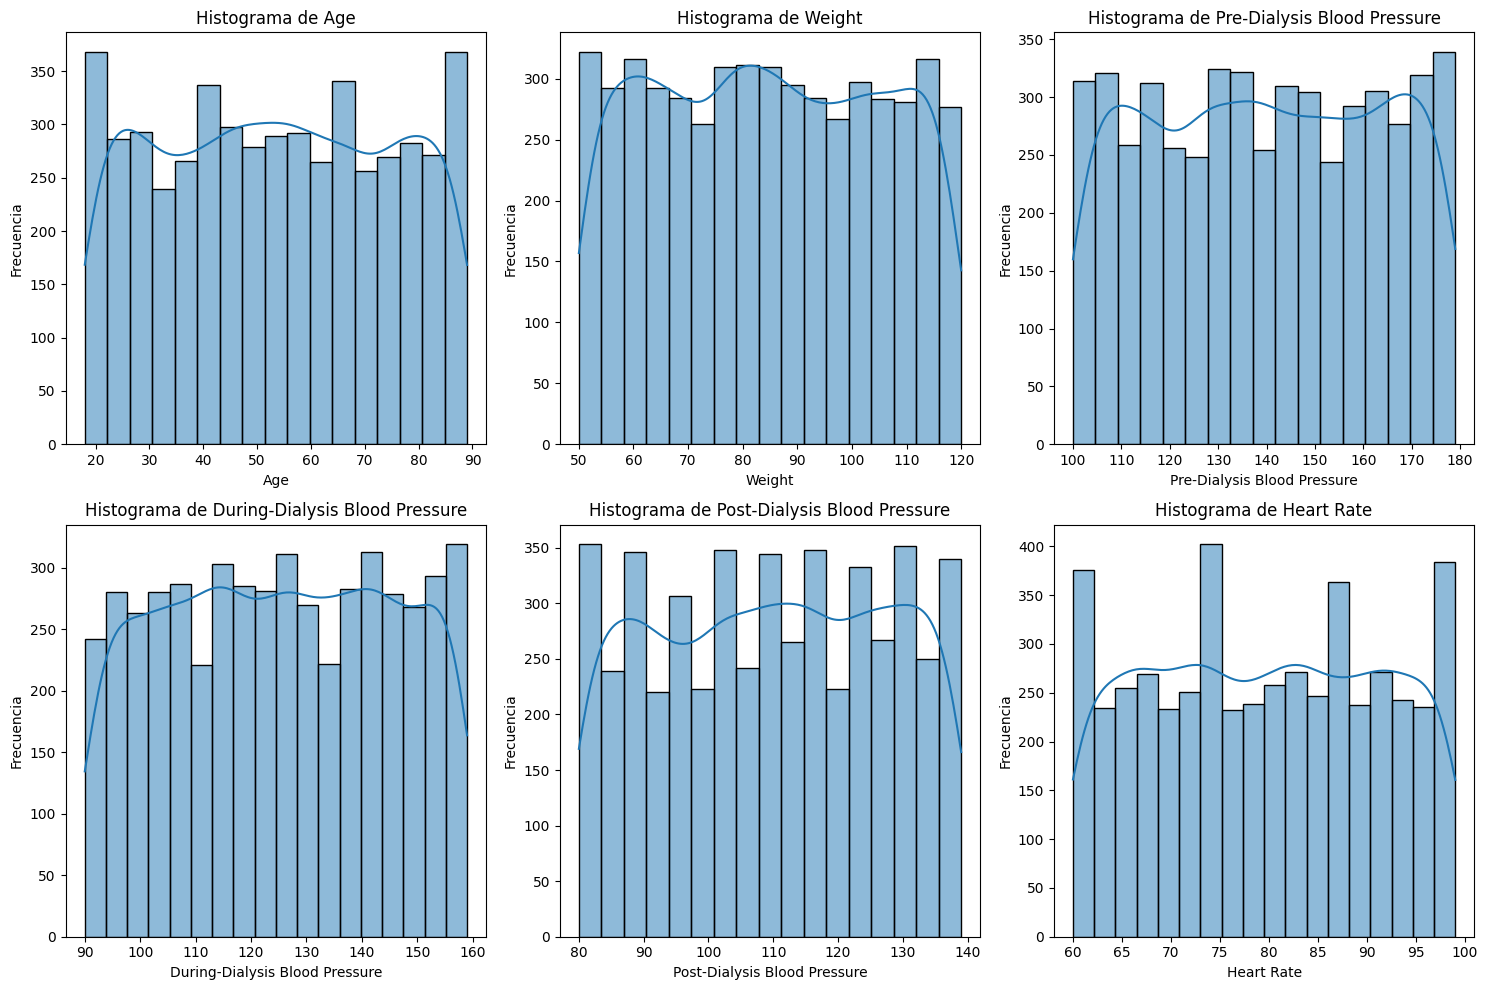

In [17]:
# Obtener las columnas numéricas
numeric_columns = hemodialysis_data.select_dtypes(include=['int64', 'float64']).columns

# Configurar el tamaño de la figura y el número de subgráficos
num_plots = min(len(numeric_columns), 6)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Iterar sobre cada columna numérica y crear un histograma
for i, column in enumerate(numeric_columns[:num_plots], 1):
    row = (i - 1) // 3
    col = (i - 1) % 3
    sns.histplot(hemodialysis_data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histograma de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

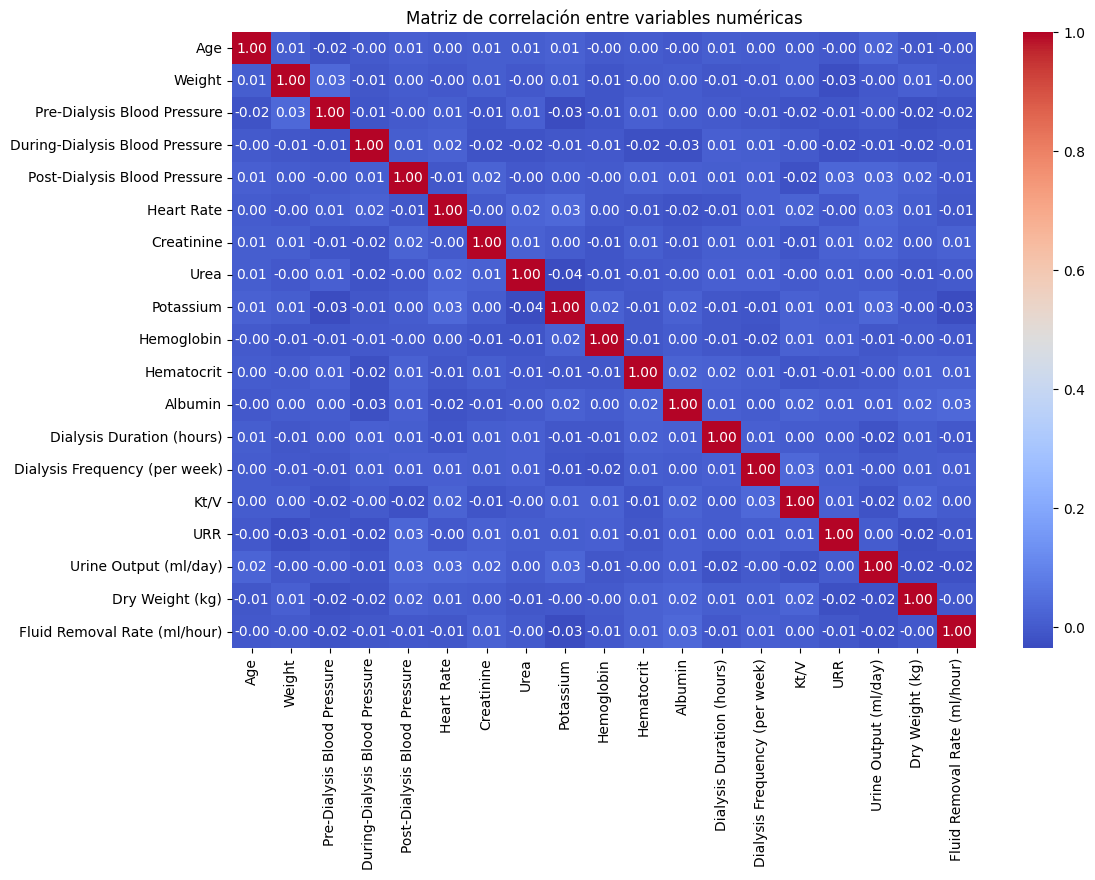

In [20]:
# Seleccionar solo columnas numéricas para calcular la matriz de correlación
numeric_columns = hemodialysis_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = hemodialysis_data[numeric_columns].corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()



<ipython-input-24-039b132735af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kidney Failure Cause', data=hemodialysis_data, palette='Set2')


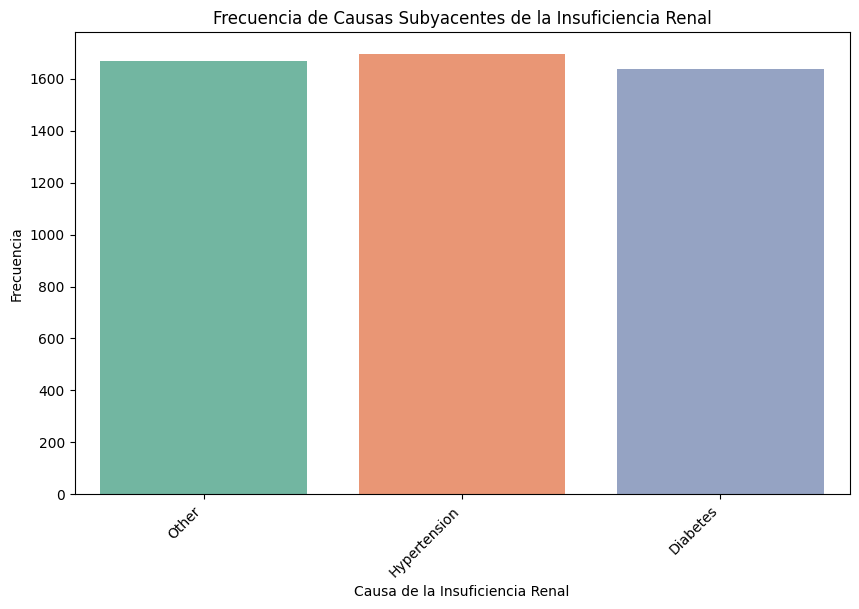

In [24]:
# Visualizar la frecuencia de las causas subyacentes de la insuficiencia renal
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidney Failure Cause', data=hemodialysis_data, palette='Set2')
plt.title('Frecuencia de Causas Subyacentes de la Insuficiencia Renal')
plt.xlabel('Causa de la Insuficiencia Renal')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()





<ipython-input-25-28a3ae691bbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=hemodialysis_data, palette='Set1')


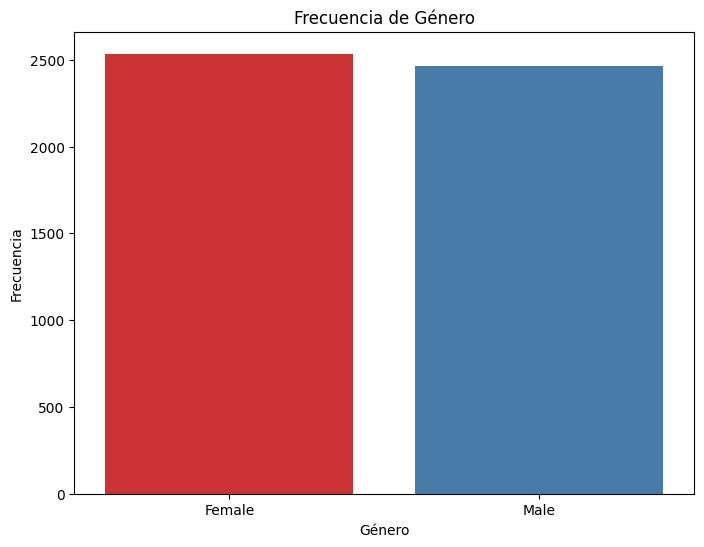

In [25]:
# Visualizar la frecuencia de género
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=hemodialysis_data, palette='Set1')
plt.title('Frecuencia de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


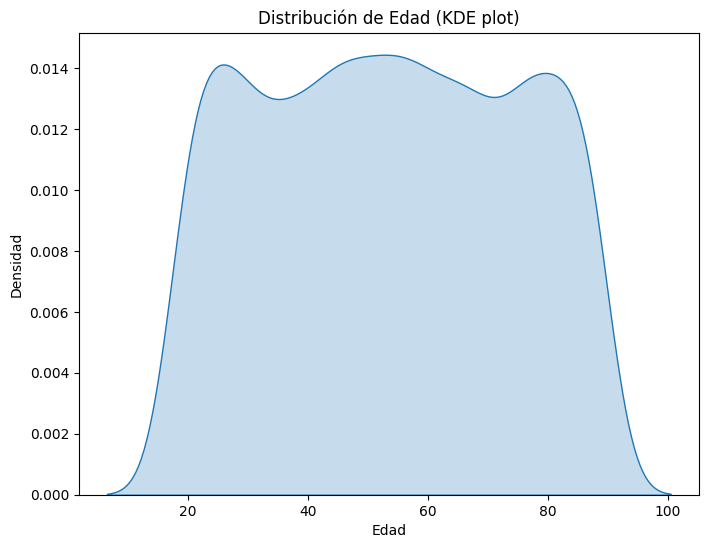

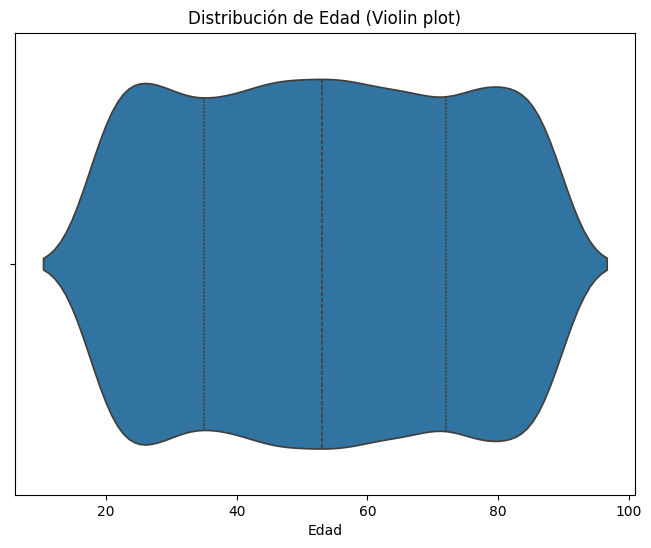

In [28]:
# Gráfico de densidad o KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=hemodialysis_data, x='Age', fill=True)
plt.title('Distribución de Edad (KDE plot)')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

# Gráfico de violin
plt.figure(figsize=(8, 6))
sns.violinplot(data=hemodialysis_data, x='Age', inner='quartile')
plt.title('Distribución de Edad (Violin plot)')
plt.xlabel('Edad')
plt.show()



<ipython-input-31-f562c804e293>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hemodialysis_data, y='Kidney Failure Cause', order=hemodialysis_data['Kidney Failure Cause'].value_counts().index, palette='viridis')


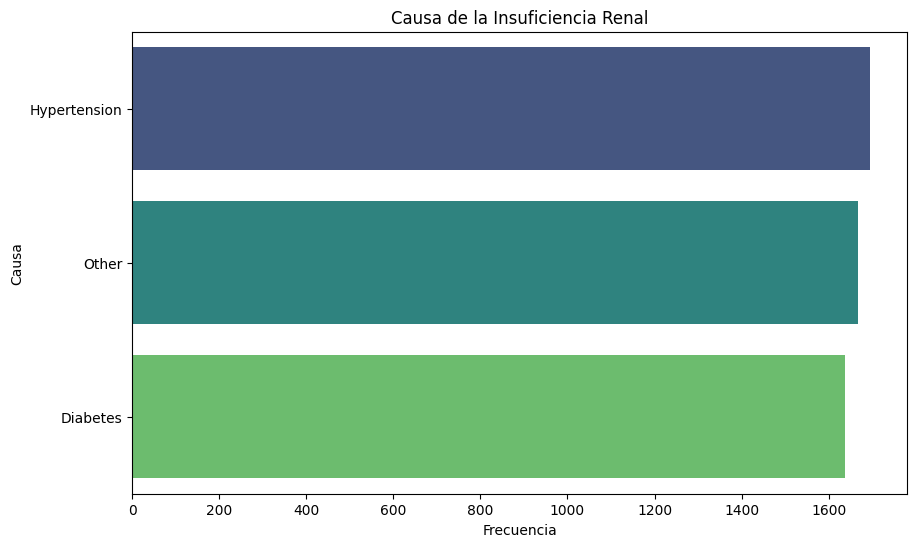

In [31]:
# Gráfico de barras ordenado
plt.figure(figsize=(10, 6))
sns.countplot(data=hemodialysis_data, y='Kidney Failure Cause', order=hemodialysis_data['Kidney Failure Cause'].value_counts().index, palette='viridis')
plt.title('Causa de la Insuficiencia Renal')
plt.xlabel('Frecuencia')
plt.ylabel('Causa')
plt.show()



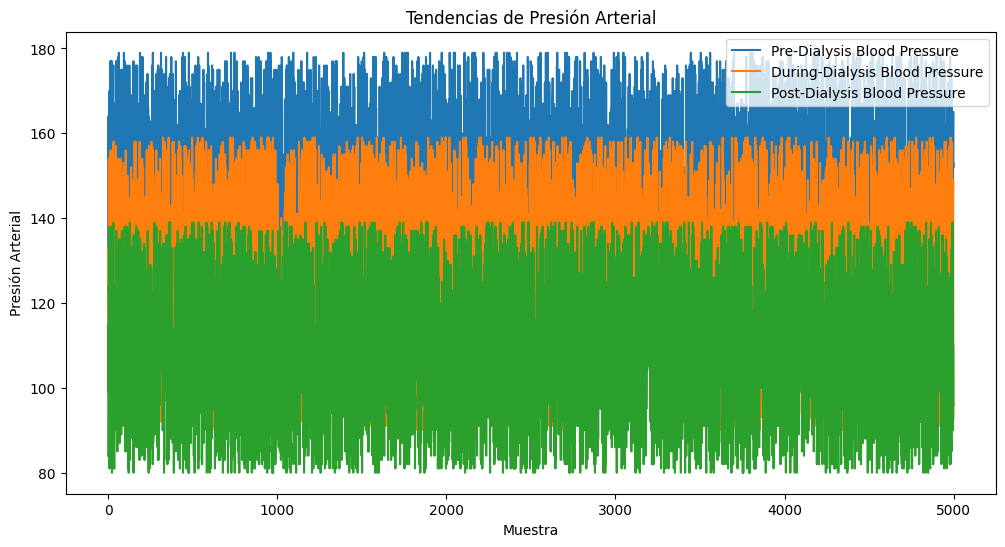

In [33]:
# Gráficos de líneas o de área
blood_pressure_cols = ['Pre-Dialysis Blood Pressure', 'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure']
plt.figure(figsize=(12, 6))
for column in blood_pressure_cols:
    sns.lineplot(data=hemodialysis_data, x=hemodialysis_data.index, y=column, label=column)
plt.title('Tendencias de Presión Arterial')
plt.xlabel('Muestra')
plt.ylabel('Presión Arterial')
plt.legend()
plt.show()



In [36]:
import plotly.express as px

# Crear un gráfico interactivo de barras
fig = px.histogram(hemodialysis_data, x='Weight', color='Gender', facet_col='Diabetes', marginal='box')
fig.update_layout(title='Distribución de Peso por Género y Diabetes', xaxis_title='Peso', yaxis_title='Frecuencia')
fig.show()


